# **df1-2nd-model-training**

# **Insurance Risk & Claims Dataset**

# **Claim Prediction:** based on Claim History - Already Claim or Not

**Give Highest preference Based on 0 Claim History**

# **Create Classification : 1 -> Already Claim Insurance 1 or More**

# **0 -> No Claims**

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/df1_scaled.csv')

In [ ]:
df1.head()

Unnamed: 0                             Policy_ID  Customer_Age  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58   
1           1  23b8c1e9-3924-46de-beb1-3b9046685257            65   
2           2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56   
3           3  972a8469-1641-4f82-8b9d-2434e465e150            35   
4           4  17fc695a-07a0-4a6e-8822-e8f36c031199            39   

   Annual_Income  Vehicle_Age_Property_Age  Claim_History  Premium_Amount  \
0       0.741442                         7              1        0.139545   
1       0.590267                         1              0        0.093670   
2       0.715891                        22              4        0.419729   
3       0.697997                        10              2        0.155499   
4       0.379538                        11              2        0.604068   

   Claim_Amount  Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  \
0      0.102080                 0                   0                 0   
1      0.232579                 0                   0                 0   
2      0.449681                 0                   1                 1   
3      0.958985                 1                   1                 1   
4      0.808517                 1                   2                 0   

   Policy_Type_Health  Policy_Type_Life  Policy_Type_Property  Gender_Female  \
0                   1                 0                     0              0   
1                   1                 0                     0              0   
2                   0                 0                     0              0   
3                   0                 0                     0              0   
4                   1                 0                     0              0   

   Gender_Male  Gender_Other  
0            1             0  
1            0             1  
2            1             0  
3            1             0  
4            1             0

In [ ]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df1.head(1)

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545       0.10208   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   

   Gender_Other  
0             0

In [ ]:
df1['Claim_History'].value_counts()

Claim_History
5    172
4    171
3    171
1    170
2    170
0    146
Name: count, dtype: int64

#General Condition

# **Claim There are upto 5 Claims Happens so i fix it when claim history is More than 2 means claim will be failed**

#**Overall Working Procedure**

**# filed claim write based on claim history more than 2 is filed and write policy type health more than 3 is filed**

**# and policy type more than 1 is filed and gender female means policy type health more than 4 is filed**

**# and Vehicle_Age_Property_Age	 is more than 15 is filed using**

In [ ]:
import pandas as pd


# Define 'Filed_Claim' based on multiple conditions
df1['Filed_Claim'] = df1.apply(lambda row: 1 if (
    row['Claim_History'] > 2 or
    row['Policy_Type_Health'] > 3 or
    row['Policy_Type_Auto'] > 1 or
    row['Policy_Type_Life'] > 1 or
    row['Policy_Type_Property'] > 1 or
    (row['Gender_Female'] == 1 and row['Policy_Type_Health'] > 4) or
    row['Vehicle_Age_Property_Age'] > 15
) else 0, axis=1)


In [ ]:
df1.head()

Policy_ID  Customer_Age  Annual_Income  \
0  bdd640fb-0667-4ad1-9c80-317fa3b1799d            58       0.741442   
1  23b8c1e9-3924-46de-beb1-3b9046685257            65       0.590267   
2  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9            56       0.715891   
3  972a8469-1641-4f82-8b9d-2434e465e150            35       0.697997   
4  17fc695a-07a0-4a6e-8822-e8f36c031199            39       0.379538   

   Vehicle_Age_Property_Age  Claim_History  Premium_Amount  Claim_Amount  \
0                         7              1        0.139545      0.102080   
1                         1              0        0.093670      0.232579   
2                        22              4        0.419729      0.449681   
3                        10              2        0.155499      0.958985   
4                        11              2        0.604068      0.808517   

   Fraudulent_Claim  Risk_Score_Encoded  Policy_Type_Auto  Policy_Type_Health  \
0                 0                   0                 0                   1   
1                 0                   0                 0                   1   
2                 0                   1                 1                   0   
3                 1                   1                 1                   0   
4                 1                   2                 0                   1   

   Policy_Type_Life  Policy_Type_Property  Gender_Female  Gender_Male  \
0                 0                     0              0            1   
1                 0                     0              0            0   
2                 0                     0              0            1   
3                 0                     0              0            1   
4                 0                     0              0            1   

   Gender_Other  Filed_Claim  
0             0            0  
1             1            0  
2             0            1  
3             0            0  
4             0            0

In [ ]:
df1['Filed_Claim'].value_counts()

Filed_Claim
1    741
0    259
Name: count, dtype: int64

In [ ]:
df1.to_csv('df1-3rd-claim-pred.csv')

# **146 Customers did't claim single time**

# **486 Customers are claim less than or equal 2 Claims**

# **so focus on claim below 2 was eligible for claims otherwise failed**

**Customer_Age** → Older or younger customers may have different claim behaviors

**Gender** → Sometimes used for risk profiling (though it depends on local regulations)

**Policy_Type** → Different policies have different likelihoods of claims (e.g., Auto vs. Life)

**Annual_Income** → Income levels can affect the likelihood of claims

**Vehicle_Age / Property_Age** → Older assets might have more claims due to wear and tear

**Claim_History** → A customer with frequent claims is likely to claim again

**Premium_Amount** → Higher premiums could indicate higher-value policies, which may correlate with higher or more frequent claims

**Risk_Score** → Pre-assessed risk category might indicate likelihood of claims

# **Input features:** Customer_Age, Gender, Policy_Type, Annual_Income, Vehicle_Age_Property_Age, Premium_Amount, Claim_History

# **Taget Column:** Filed_Claim

In [ ]:
feature = df1[['Customer_Age','Policy_Type_Auto',	'Policy_Type_Health',	'Policy_Type_Life',	'Policy_Type_Property',	'Gender_Female',	'Gender_Male',	'Gender_Other','Annual_Income','Vehicle_Age_Property_Age','Premium_Amount','Claim_History']]
target = df1['Filed_Claim']

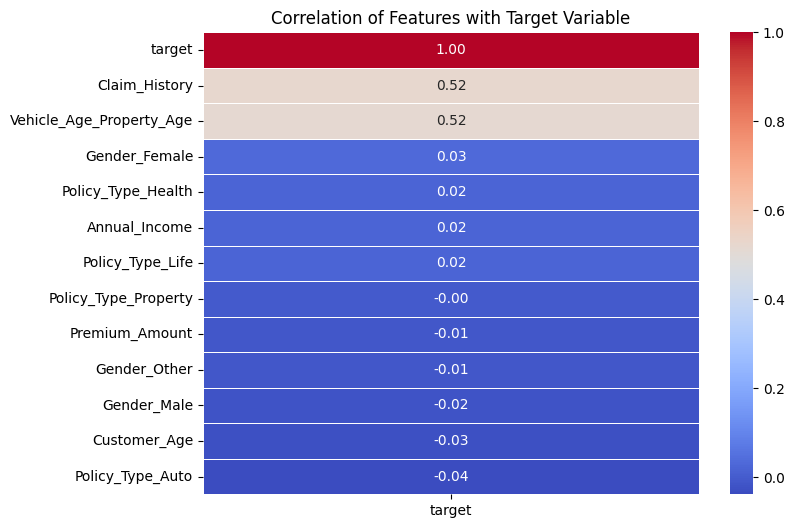

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
df = feature.copy()
df['target'] = target  # Add target column to the DataFrame

# Calculate correlation matrix
correlation_matrix = df.corr()

# Isolate target correlations
target_corr = correlation_matrix[['target']].sort_values(by='target', ascending=False)

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and show
plt.title('Correlation of Features with Target Variable')
plt.show()


# **1) Model Training**

In [ ]:
x = feature
y = target

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
target.value_counts()

Filed_Claim
1    741
0    259
Name: count, dtype: int64

# **Target is Binary Classification Type**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logis_model = LogisticRegression()

In [ ]:
logis_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **For Test prediction**

In [ ]:
y_pred_test = logis_model.predict(x_test)

# **Test Data**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")


Accuracy: 0.915
Precision: 0.9371069182389937
Recall: 0.9551282051282052
F1 Score: 0.946031746031746
Confusion Matrix:
[[ 34  10]
 [  7 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        44
           1       0.94      0.96      0.95       156

    accuracy                           0.92       200
   macro avg       0.88      0.86      0.87       200
weighted avg       0.91      0.92      0.91       200



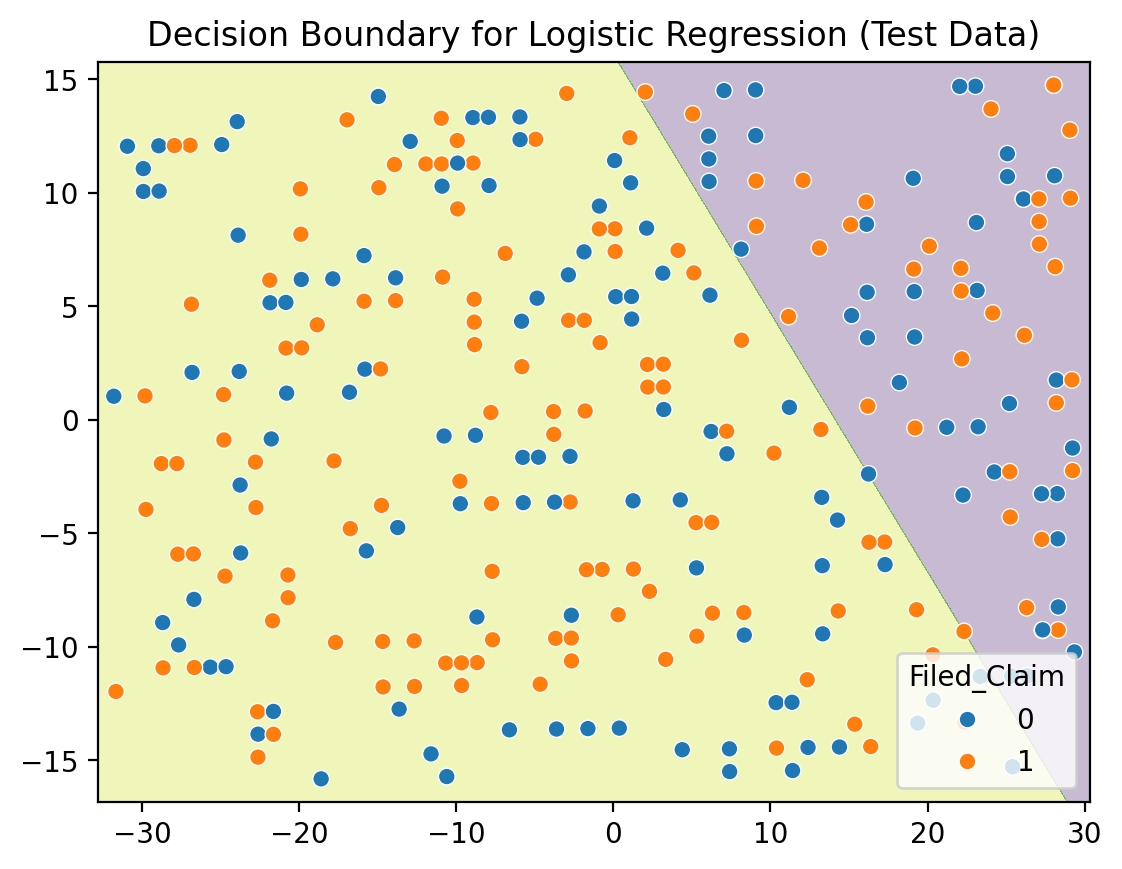

**1) 0 (blue points): No filed claim - as 2 or Below Claims are alow to next Claim**

**2) 1 (orange points): Filed claim**

**3) Each shade shows the area where the model predicts either class "0" or "1".For example, the lighter region might represent the model’s prediction for "No filed claim" (class 0) - Still 0 Claims Happens,**

**4) and the darker region for "Filed claim" (class 1).**

In [ ]:
#######################################################################################################

# **Train and Test Result Compare to Overfit or Underfit**

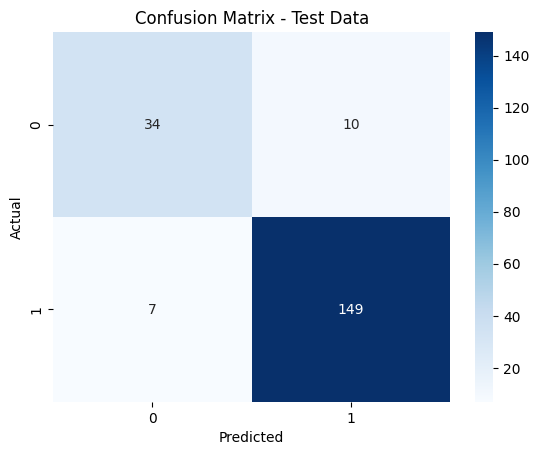

Test Data Results:
Accuracy: 0.915
Precision: 0.9371069182389937
Recall: 0.9551282051282052
F1 Score: 0.946031746031746
True Positives (TP): 149
True Negatives (TN): 34
False Positives (FP): 10
False Negatives (FN): 7

Interpretation:
- True Positives: 149 cases where the model correctly predicted a filed claim.
- True Negatives: 34 cases where the model correctly predicted no filed claim.
- False Positives: 10 cases where the model wrongly predicted a filed claim when there was none.
- False Negatives: 7 cases where the model missed an actual filed claim.

Train Data Results:
Accuracy: 0.91625
Precision: 0.9389830508474576
Recall: 0.947008547008547
F1 Score: 0.9429787234042554

Model seems well-balanced between train and test data.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logis_model.predict(x_test)

# Predictions for train data
y_pred_train = logis_model.predict(x_train)

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted a filed claim.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no filed claim.")
print(f"- False Positives: {FP} cases where the model wrongly predicted a filed claim when there was none.")
print(f"- False Negatives: {FN} cases where the model missed an actual filed claim.")


# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


# **Interpretation:**

- True Positives: 149 cases where the model correctly predicted a filed claim.

- True Negatives: 34 cases where the model correctly predicted no filed claim.

- False Positives: 10 cases where the model wrongly predicted a filed claim when there was none.
- False Negatives: 7 cases where the model missed an actual filed claim.

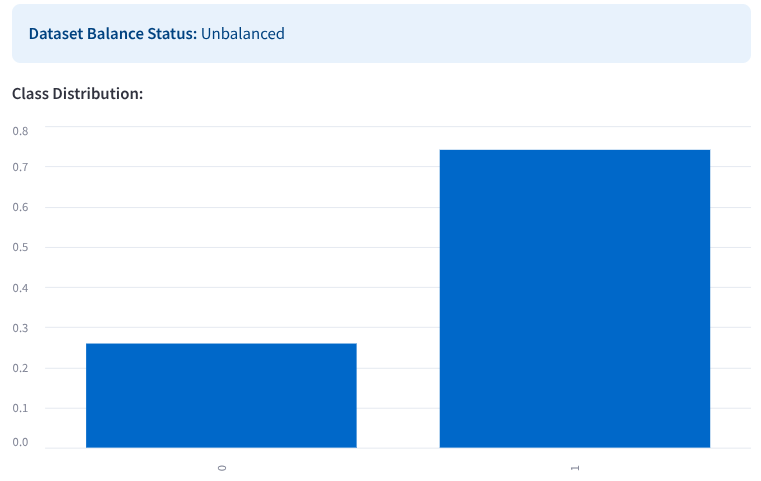

**My Dataset is Balanced**

**72:28**

# **ROC and AUC Curve**

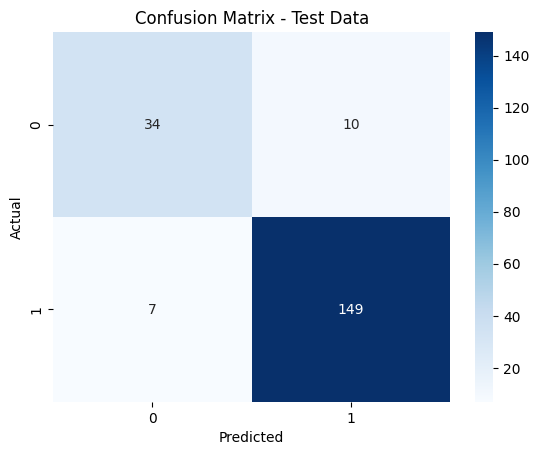

Test Data Results:
Accuracy: 0.915
Precision: 0.9371069182389937
Recall: 0.9551282051282052
F1 Score: 0.946031746031746
True Positives (TP): 149
True Negatives (TN): 34
False Positives (FP): 10
False Negatives (FN): 7

Interpretation:
- True Positives: 149 cases where the model correctly predicted fraud.
- True Negatives: 34 cases where the model correctly predicted no fraud.
- False Positives: 10 cases where the model wrongly predicted fraud when there was none.
- False Negatives: 7 cases where the model missed actual fraud.


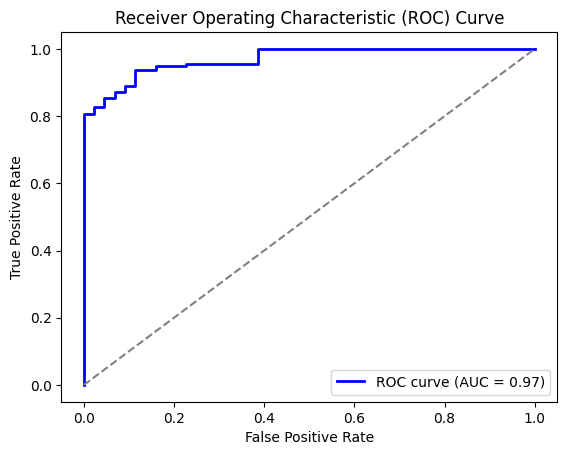


AUC (Area Under the Curve): 0.9694055944055944

Why ROC and AUC are important:
- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).
- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.
- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.

Suggested optimal threshold: 0.70
- This threshold balances sensitivity and specificity to achieve the best classification performance.

Train Data Results:
Accuracy: 0.91625
Precision: 0.9389830508474576
Recall: 0.947008547008547
F1 Score: 0.9429787234042554

Model seems well-balanced between train and test data.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions for test data
y_pred_test = logis_model.predict(x_test)

# Predictions for train data
y_pred_train = logis_model.predict(x_train)

# Predicted probabilities for ROC curve
y_probs_test = logis_model.predict_proba(x_test)[:, 1]

# Calculate metrics for test data
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Calculate metrics for train data
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Confusion matrix for test data
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Extract TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

# Print test data metrics
print("Test Data Results:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# Print interpretation of results
print("\nInterpretation:")
print(f"- True Positives: {TP} cases where the model correctly predicted fraud.")
print(f"- True Negatives: {TN} cases where the model correctly predicted no fraud.")
print(f"- False Positives: {FP} cases where the model wrongly predicted fraud when there was none.")
print(f"- False Negatives: {FN} cases where the model missed actual fraud.")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"\nAUC (Area Under the Curve): {roc_auc}")

# Interpretation of ROC and AUC
print("\nWhy ROC and AUC are important:")
print("- The ROC curve shows the trade-off between sensitivity (True Positive Rate) and specificity (1 - False Positive Rate).")
print("- AUC represents the probability that the model ranks a random positive example more highly than a random negative example.")
print("- AUC closer to 1 means a better-performing model, while 0.5 suggests no discrimination between classes.")

# Choosing an appropriate threshold
best_threshold_index = (tpr - fpr).argmax()
best_threshold = thresholds[best_threshold_index]
print(f"\nSuggested optimal threshold: {best_threshold:.2f}")
print("- This threshold balances sensitivity and specificity to achieve the best classification performance.")

# Print train data metrics
print("\nTrain Data Results:")
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")

# Check for overfitting or underfitting
if abs(accuracy_train - accuracy_test) > 0.05:
    if accuracy_train > accuracy_test:
        print("\nPossible Overfitting: Model performs much better on training data than test data.")
    else:
        print("\nPossible Underfitting: Model performs better on test data than training data.")
else:
    print("\nModel seems well-balanced between train and test data.")


# **Differnce of True Posative Rate (TPR) and False Posative Rate (FPR) : TPR-FPR to find Best Optimal Threshold for this model**

**AUC (Area Under the Curve): 0.9755244755244754 is Almost near to 1: so its very Good**

# **Suggested optimal threshold: 0.84**

AUC stands for Area Under the Curve and ROC stands for Receiver Operating Characteristic.

Maximum Increase True Posative Rate from False Posative Rate

In [ ]:
############################################################################################

# **Cross Validation: Stratified K-folds**

**Focusing Class 0 as -> 25% and Class 1 as -> 75%**

**to extra focusing on Minority Class also**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-Validation Results:
Average Train Accuracy: 0.92
Average Test Accuracy: 0.91
Average Precision: 0.93
Average Recall: 0.94
Average F1 Score: 0.94
Average AUC: 0.97


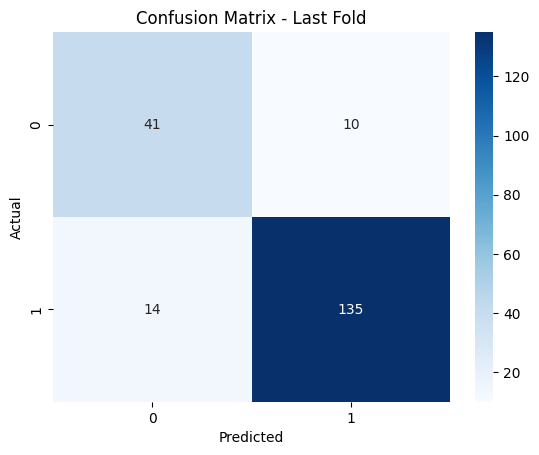

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Stratified K-Fold setup with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder metrics
accuracies, precisions, recalls, f1_scores, aucs = [], [], [], [], []
train_accuracies = []

# Class distribution focus: 25% class 0, 75% class 1
class_distribution = {0: 0.25, 1: 0.75}

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model
    logis_model.fit(x_train, y_train)

    # Predictions
    y_pred_train = logis_model.predict(x_train)
    y_pred_test = logis_model.predict(x_test)
    y_probs_test = logis_model.predict_proba(x_test)[:, 1]

    # Calculate metrics
    train_accuracies.append(accuracy_score(y_train, y_pred_train))
    accuracies.append(accuracy_score(y_test, y_pred_test))
    precisions.append(precision_score(y_test, y_pred_test))
    recalls.append(recall_score(y_test, y_pred_test))
    f1_scores.append(f1_score(y_test, y_pred_test))

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
    aucs.append(auc(fpr, tpr))

# Average metrics
print("\nCross-Validation Results:")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.2f}")
print(f"Average Test Accuracy: {np.mean(accuracies):.2f}")
print(f"Average Precision: {np.mean(precisions):.2f}")
print(f"Average Recall: {np.mean(recalls):.2f}")
print(f"Average F1 Score: {np.mean(f1_scores):.2f}")
print(f"Average AUC: {np.mean(aucs):.2f}")

# Visualize the last confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Last Fold')
plt.show()


# Class distribution focus: 25% class 0, 75% class 1

**class_distribution = {0: 0.25, 1: 0.75}**

In [ ]:
import joblib
# Fit model
logis_model.fit(x_train, y_train)

    # Save model
joblib.dump(logis_model, 'logistic_regression_model.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']